# titanic 문제 풀이

데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')
df.set_index(['PassengerId'], inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


결측값 확인

In [2]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age, Cabin, Embarked 의 feature에 결측치가 존재하고 이를 정형화 한다.

## Age 결측치 처리

먼저 Age 구간별 생존율을 구한 뒤에 Age가 nan인 그룹의 생존율과 가장 유사한 나이대의 평균값을 nan인 그룹의 Age로 정한다.

In [3]:
def surviverate_by_age(df):
    for i in range(10, 61, 10):
        grp = df.loc[np.logical_and(df['Age'] < i, df['Age'] >= i-10), ['Survived']]
        if grp.shape[0] == 0:
            continue
        print(i-10,'->', grp['Survived'].sum()/grp.shape[0], 'samples:', grp.shape[0])
    grp = df.loc[df['Age'] >= 60, ['Survived']]
    print('60~','->', grp['Survived'].sum()/grp.shape[0], 'samples:', grp.shape[0])
    grp = df.loc[df['Age'].isna(), ['Survived']]
    print('NaN','->', grp['Survived'].sum()/grp.shape[0], 'samples:', grp.shape[0])
surviverate_by_age(df)

0 -> 0.6129032258064516 samples: 62
10 -> 0.4019607843137255 samples: 102
20 -> 0.35 samples: 220
30 -> 0.437125748502994 samples: 167
40 -> 0.38202247191011235 samples: 89
50 -> 0.4166666666666667 samples: 48
60~ -> 0.2692307692307692 samples: 26
NaN -> 0.2937853107344633 samples: 177


나이 미상의 샘플들의 생존율이 비교적 낮은 이유를 알기 위해서 성별에 따라 분류

In [4]:
grp1 = df.loc[df['Sex']=='male', ['Survived', 'Age']]
surviverate_by_age(grp1)

0 -> 0.59375 samples: 32
10 -> 0.12280701754385964 samples: 57
20 -> 0.16891891891891891 samples: 148
30 -> 0.21495327102803738 samples: 107
40 -> 0.21052631578947367 samples: 57
50 -> 0.13333333333333333 samples: 30
60~ -> 0.13636363636363635 samples: 22
NaN -> 0.12903225806451613 samples: 124


In [5]:
grp1 = df.loc[df['Sex']=='female', ['Survived', 'Age']]
surviverate_by_age(grp1)

0 -> 0.6333333333333333 samples: 30
10 -> 0.7555555555555555 samples: 45
20 -> 0.7222222222222222 samples: 72
30 -> 0.8333333333333334 samples: 60
40 -> 0.6875 samples: 32
50 -> 0.8888888888888888 samples: 18
60~ -> 1.0 samples: 4
NaN -> 0.6792452830188679 samples: 53


티켓 클래스에 따른 분류

In [6]:
grp1 = df.loc[df['Pclass']==3, ['Survived', 'Age']]
surviverate_by_age(grp1)

0 -> 0.4523809523809524 samples: 42
10 -> 0.25757575757575757 samples: 66
20 -> 0.23308270676691728 samples: 133
30 -> 0.21739130434782608 samples: 69
40 -> 0.058823529411764705 samples: 34
50 -> 0.0 samples: 6
60~ -> 0.2 samples: 5
NaN -> 0.25 samples: 136


In [7]:
grp1 = df.loc[df['Pclass']==2, ['Survived', 'Age']]
surviverate_by_age(grp1)

0 -> 1.0 samples: 17
10 -> 0.5 samples: 18
20 -> 0.41509433962264153 samples: 53
30 -> 0.3958333333333333 samples: 48
40 -> 0.5555555555555556 samples: 18
50 -> 0.3333333333333333 samples: 15
60~ -> 0.25 samples: 4
NaN -> 0.36363636363636365 samples: 11


In [8]:
grp1 = df.loc[df['Pclass']==1, ['Survived', 'Age']]
surviverate_by_age(grp1)

0 -> 0.6666666666666666 samples: 3
10 -> 0.8333333333333334 samples: 18
20 -> 0.7058823529411765 samples: 34
30 -> 0.78 samples: 50
40 -> 0.5945945945945946 samples: 37
50 -> 0.5555555555555556 samples: 27
60~ -> 0.29411764705882354 samples: 17
NaN -> 0.4666666666666667 samples: 30


나이 미상의 샘플의 생존율이 비교적 낮은 이유는 생존율이 낮은 남성과 3class 샘플들이 주로 나이가 NaN이기 때문이다.

10세 이하의 어린이일 수록 생존율이 높은 경향을 보이고 그 이상 나이에서는 특별한 차이를 보이지 않으므로 나이 결측치는 평균값으로 정한다.

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean(skipna=True))
df['Age'].mean()

29.699117647058763

## Cabin 결측치 처리

Cabin number를 보유한 샘플과 그렇지 않은 샘플의 생존율을 비교

In [10]:
grp1 = df.loc[df['Cabin'].isna(), ['Survived']]
grp2 = df.loc[df['Cabin'].notna(), ['Survived']]
print('no cabin->', grp1['Survived'].sum()/grp1.shape[0],'sample:', grp1.shape[0])
print('has cabin->', grp2['Survived'].sum()/grp2.shape[0],'sample:', grp2.shape[0])

no cabin-> 0.29985443959243085 sample: 687
has cabin-> 0.6666666666666666 sample: 204


cabin 값이 있는 샘플과 그렇지 않은 샘플의 생존율 차이가 2배 이상나므로 cabin feature를 nan이 아닌 값을 1.0, nan인 값을 0.0으로 인코딩

In [11]:
df['Cabin'] = df['Cabin'].map(lambda x: 0.0 if x is np.nan else 1.0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0.0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1.0,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0.0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1.0,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0.0,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1.0,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0.0,S


## Embarked 결측치 처리

Embarked NaN인 값 분석

In [12]:
grp = df.loc[df['Embarked'].isna(), :]
grp

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,1.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,1.0,NaN


NaN 값인 두 샘플은 모두 여성이고 1클래스 이다.

In [13]:
print(df['Embarked'].value_counts())
for i in ('male', 'female'):
    grp = df.loc[df['Sex']==i, ['Pclass', 'Embarked']]
    for j in (1, 2, 3):
        print(i, j)
        grp1 = grp.loc[grp['Pclass']==j, ['Embarked']]
        print(grp1['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
male 1
S    79
C    42
Q     1
Name: Embarked, dtype: int64
male 2
S    97
C    10
Q     1
Name: Embarked, dtype: int64
male 3
S    265
C     43
Q     39
Name: Embarked, dtype: int64
female 1
S    48
C    43
Q     1
Name: Embarked, dtype: int64
female 2
S    67
C     7
Q     2
Name: Embarked, dtype: int64
female 3
S    88
Q    33
C    23
Name: Embarked, dtype: int64


여성과 1클래스의 비율이 가장 많은 C로 바꾼다.

In [14]:
df['Embarked'] = df['Embarked'].fillna('C')
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## 정규화 작업

기존의 데이터를 정규화하여 새로운 데이터프레임을 생성한다.

In [15]:
new_df = pd.DataFrame()
new_df['Pclass2'] = df['Pclass'].map(lambda x: 1.0 if x == 2 else 0.0)
new_df['Pclass3'] = df['Pclass'].map(lambda x: 1.0 if x == 3 else 0.0)

In [16]:
new_df['male'] = df['Sex'].map(lambda x: 1.0 if x=='male' else 0.0)
new_df['Age'] = df['Age'].map(lambda x: 1.0 if x/60 > 1.0 else x/60)
new_df['Family_Size'] = df['SibSp'] + df['Parch']
new_df['Fare'] = df['Fare'] / (new_df['Family_Size']+1)
new_df['Family_Size'] = new_df['Family_Size'].map(lambda x: 1.0 if x/10 > 1.0 else x/10)
new_df['Fare'] = new_df['Fare'].map(lambda x: 1.0 if x/100 > 1.0 else x/100)
new_df['Cabin'] = df['Cabin']
new_df['Embarked_S'] = df['Embarked'].map(lambda x: 1.0 if x=='S' else 0.0)
new_df['Embarked_C'] = df['Embarked'].map(lambda x: 1.0 if x=='C' else 0.0)
new_df['Embarked_Q'] = df['Embarked'].map(lambda x: 1.0 if x=='Q' else 0.0)
new_df

,Pclass2,Pclass3,male,Age,Family_Size,Fare,Cabin,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,
1,0.0,1.0,1.0,0.366667,0.1,0.036250,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.633333,0.1,0.356416,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.433333,0.0,0.079250,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.583333,0.1,0.265500,1.0,1.0,0.0,0.0
5,0.0,1.0,1.0,0.583333,0.0,0.080500,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
887,1.0,0.0,1.0,0.450000,0.0,0.130000,0.0,1.0,0.0,0.0
888,0.0,0.0,0.0,0.316667,0.0,0.300000,1.0,1.0,0.0,0.0
889,0.0,1.0,0.0,0.494985,0.3,0.058625,0.0,1.0,0.0,0.0


## 학습 데이터, 검증 데이터 나누기

In [17]:
from sklearn.model_selection import train_test_split
t_x, v_x, t_y, v_y = train_test_split(new_df, df['Survived'], test_size=0.25, shuffle=True, random_state=42)

## 딥러닝 레이어 층 쌓고 학습하기

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
m = Sequential()
m.add(layers.Dense(16, input_dim=10, activation='relu'))
m.add(layers.Dropout(0.5))
m.add(layers.Dense(4, activation='relu'))
m.add(layers.Dropout(0.5))
m.add(layers.Dense(1, activation='sigmoid'))
m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [20]:
e_st=EarlyStopping(patience=3, restore_best_weights=True)
hy=m.fit(t_x,t_y,epochs=100,validation_data=(v_x,v_y), callbacks=[e_st])

Epoch 1/100
21/21 [==============================] - 1s 9ms/step - loss: 0.7448 - accuracy: 0.4656 - val_loss: 0.6941 - val_accuracy: 0.5516
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7285 - accuracy: 0.5015 - val_loss: 0.6897 - val_accuracy: 0.5919
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.5180 - val_loss: 0.6873 - val_accuracy: 0.5605
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.5284 - val_loss: 0.6856 - val_accuracy: 0.6143
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5749 - val_loss: 0.6837 - val_accuracy: 0.6323
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5973 - val_loss: 0.6816 - val_accuracy: 0.6457
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6183 - val_loss: 0.6794 - val_accuracy: 0.6413
Epoch 8/100
2

Epoch 59/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.7635 - val_loss: 0.5123 - val_accuracy: 0.7803
Epoch 60/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.7410 - val_loss: 0.5119 - val_accuracy: 0.7848
Epoch 61/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.7769 - val_loss: 0.5112 - val_accuracy: 0.7848
Epoch 62/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7754 - val_loss: 0.5104 - val_accuracy: 0.7803
Epoch 63/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.7665 - val_loss: 0.5096 - val_accuracy: 0.7982
Epoch 64/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7829 - val_loss: 0.5086 - val_accuracy: 0.8027
Epoch 65/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7665 - val_loss: 0.5078 - val_accuracy: 0.7803
Epoch 

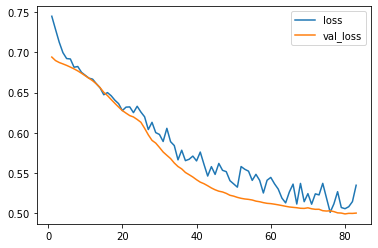

In [21]:
import matplotlib.pyplot as plt
ec=range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'], label='loss')
plt.plot(ec,hy.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## 테스트 데이터 예측하기

데이터를 불러오고 전처리

In [22]:
ttdf = pd.read_csv('test.csv', index_col=['PassengerId'])
ttdf

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### 결측값 처리

In [23]:
ttdf.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [24]:
ttdf['Age'] = ttdf['Age'].fillna(29.699117647058763)

In [25]:
ttdf.loc[ttdf['Fare'].isna(), :]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [26]:
new_df.loc[df['Pclass']==3, ['Fare']].median()*100

Fare    7.75
dtype: float64

In [27]:
ttdf['Fare'] = ttdf['Fare'].fillna(7.75)
ttdf['Cabin'] = ttdf['Cabin'].map(lambda x: 0.0 if x is np.nan else 1.0)
ttdf.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [28]:
new_df = pd.DataFrame()
new_df['Pclass2'] = ttdf['Pclass'].map(lambda x: 1.0 if x == 2 else 0.0)
new_df['Pclass3'] = ttdf['Pclass'].map(lambda x: 1.0 if x == 3 else 0.0)
new_df['male'] = ttdf['Sex'].map(lambda x: 1.0 if x=='male' else 0.0)
new_df['Age'] = ttdf['Age'].map(lambda x: 1.0 if x/60 > 1.0 else x/60)
new_df['Family_Size'] = ttdf['SibSp'] + ttdf['Parch']
new_df['Fare'] = ttdf['Fare'] / (new_df['Family_Size']+1)
new_df['Family_Size'] = new_df['Family_Size'].map(lambda x: 1.0 if x/10 > 1.0 else x/10)
new_df['Fare'] = new_df['Fare'].map(lambda x: 1.0 if x/100 > 1.0 else x/100)
new_df['Cabin'] = ttdf['Cabin']
new_df['Embarked_S'] = ttdf['Embarked'].map(lambda x: 1.0 if x=='S' else 0.0)
new_df['Embarked_C'] = ttdf['Embarked'].map(lambda x: 1.0 if x=='C' else 0.0)
new_df['Embarked_Q'] = ttdf['Embarked'].map(lambda x: 1.0 if x=='Q' else 0.0)
new_df

,Pclass2,Pclass3,male,Age,Family_Size,Fare,Cabin,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,
892,0.0,1.0,1.0,0.575000,0.0,0.078292,0.0,0.0,0.0,1.0
893,0.0,1.0,0.0,0.783333,0.1,0.035000,0.0,1.0,0.0,0.0
894,1.0,0.0,1.0,1.000000,0.0,0.096875,0.0,0.0,0.0,1.0
895,0.0,1.0,1.0,0.450000,0.0,0.086625,0.0,1.0,0.0,0.0
896,0.0,1.0,0.0,0.366667,0.2,0.040958,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1305,0.0,1.0,1.0,0.494985,0.0,0.080500,0.0,1.0,0.0,0.0
1306,0.0,0.0,0.0,0.650000,0.0,1.000000,1.0,0.0,1.0,0.0
1307,0.0,1.0,1.0,0.641667,0.0,0.072500,0.0,1.0,0.0,0.0


### 예측값 구하기

In [29]:
y = np.round(m.predict(new_df), 0).astype('int')
y = pd.DataFrame(y, index=ttdf.index, columns=['Survived'])
y

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


예측 데이터프레임을 csv파일로 저장

In [30]:
y.to_csv('submit.csv')